In [1]:
import pandas as pd
import airquality as aq
from airquality.utils import describe

%matplotlib inline

# Limit output length for readability
pd.set_option("display.max_rows", 10)

In [2]:
test_sensor_id = 140
sensor_info = aq.luftdaten.Sensor(sensor_id=test_sensor_id)

Using cached  sensor 140 metadata from luftdaten.info


In [3]:
sensor_info.metadata

id                                   2696263334
location.altitude                         282.5
location.country                             DE
location.id                                  65
location.latitude                       48.7780
                                       ...     
sensor.id                                   140
sensor.pin                                    1
sensor.sensor_type.id                        14
sensor.sensor_type.manufacturer    Nova Fitness
sensor.sensor_type.name                  SDS011
Name: metadata, Length: 11, dtype: object

In [4]:
# Luftdaten.info provides current measurements along with the sensor metadata.
sensor_info.current_measurements

{'PM10': 13.87, 'PM2.5': 8.27}

In [5]:
sensor_info.phenomena

['PM10', 'PM2.5']

In [6]:
sensor_info.units

{'PM2.5': 'µg/m³', 'PM10': 'µg/m³'}

### Retrieve data history
Data are retrieved from cache or server and then cleaned.

In [7]:
sensor_info.get_measurements(start_date="2018-11-04",
                             end_date="2018-11-08")

Using cached  luftdaten.info data for sensor 140 on 2018-11-04
Using cached  luftdaten.info data for sensor 140 on 2018-11-05
Using cached  luftdaten.info data for sensor 140 on 2018-11-06
Using cached  luftdaten.info data for sensor 140 on 2018-11-07
Using cached  luftdaten.info data for sensor 140 on 2018-11-08


In [8]:
sensor_info.measurements

,PM10,PM2.5
timestamp,,
2018-11-04 00:01:54+00:00,21.03,14.50
2018-11-04 00:04:22+00:00,18.73,15.03
2018-11-04 00:06:49+00:00,20.43,15.57
2018-11-04 00:09:17+00:00,16.93,13.60
2018-11-04 00:11:45+00:00,20.97,14.90
...,...,...
2018-11-08 23:48:40+00:00,18.93,11.63
2018-11-08 23:51:07+00:00,14.40,10.37
2018-11-08 23:53:35+00:00,17.90,11.47


In [9]:
describe(sensor_info.measurements)

,PM10,PM2.5
count,2921.00,2921.00
mean,20.10,11.80
std,10.46,5.87
min,2.87,1.40
1%,4.58,2.00
50%,19.83,11.70
99%,46.30,29.47
max,224.67,32.67


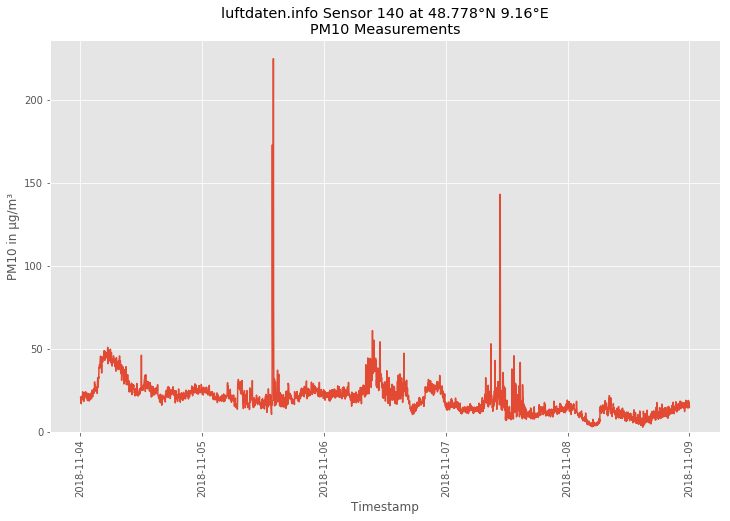

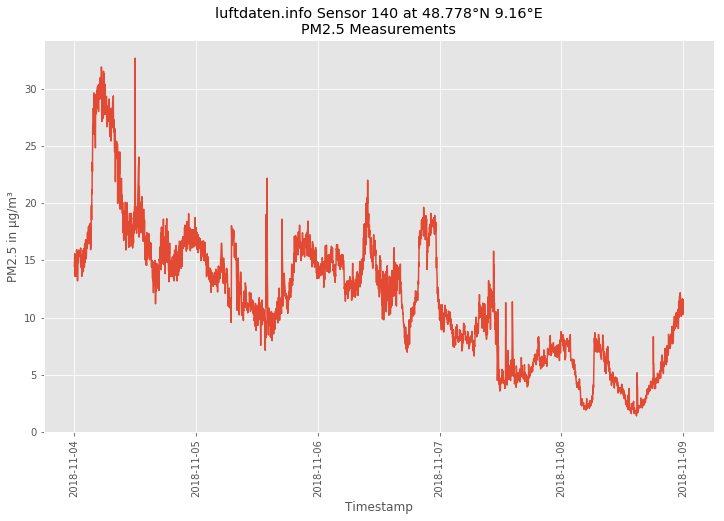

([<Figure size 864x576 with 1 Axes>, <Figure size 864x576 with 1 Axes>],
  <matplotlib.axes._subplots.AxesSubplot at 0x7f27cad00e10>])

In [10]:
sensor_info.plot_data(sensor_info.measurements)

### Inspect, summarize and plot hourly means

In [11]:
sensor_info.get_hourly_means()

,PM10,PM2.5
Period,,
2018-11-04 00:00,20.79,14.88
2018-11-04 01:00,21.28,15.02
2018-11-04 02:00,24.24,16.52
2018-11-04 03:00,32.70,22.19
2018-11-04 04:00,43.37,28.77
...,...,...
2018-11-08 19:00,11.42,5.30
2018-11-08 20:00,12.77,6.41
2018-11-08 21:00,14.83,7.97


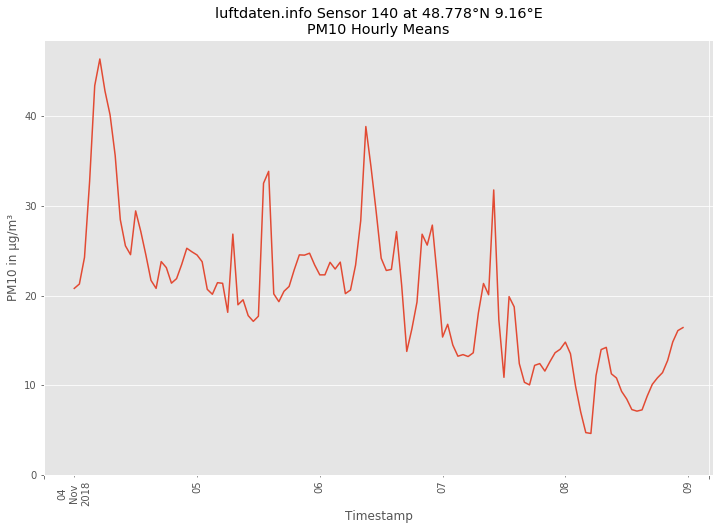

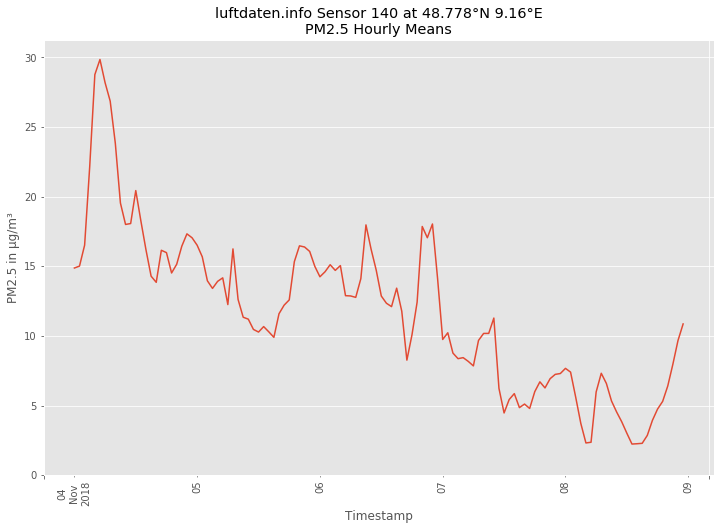

([<Figure size 864x576 with 1 Axes>, <Figure size 864x576 with 1 Axes>],
  <matplotlib.axes._subplots.AxesSubplot at 0x7f27cabc8be0>])

In [12]:
sensor_info.plot_hourly_means()

### Check distribution of sample intervals
Time series analyses tend to be easier with regularly spaced intervals. How regular are ours? Ideally all data points will be in the same interval group.

In [13]:
sensor_info.intervals.head(10)

00:02:28    1508
00:02:27    1240
00:02:29     120
00:02:30      17
00:02:33      11
00:02:32      11
00:02:31       4
00:02:34       3
00:02:35       1
00:04:49       1
Name: timestamp, dtype: int64

### List sensors near a given location
Defaults to searching within an 8 kilometer radius around the center of Stuttgart

In [14]:
aq.luftdaten.search_proximity()

,sensor_type,latitude,longitude,distance
sensor_id,,,,
17129,SDS011,50.85,4.35,0.21
17125,SDS011,50.85,4.35,0.45
17547,DHT22,50.85,4.36,0.66
17546,SDS011,50.85,4.36,0.66
14410,SDS011,50.85,4.35,0.70
...,...,...,...,...
13912,DHT22,50.87,4.25,7.16
13911,SDS011,50.87,4.25,7.16
15960,SDS011,50.89,4.43,7.54


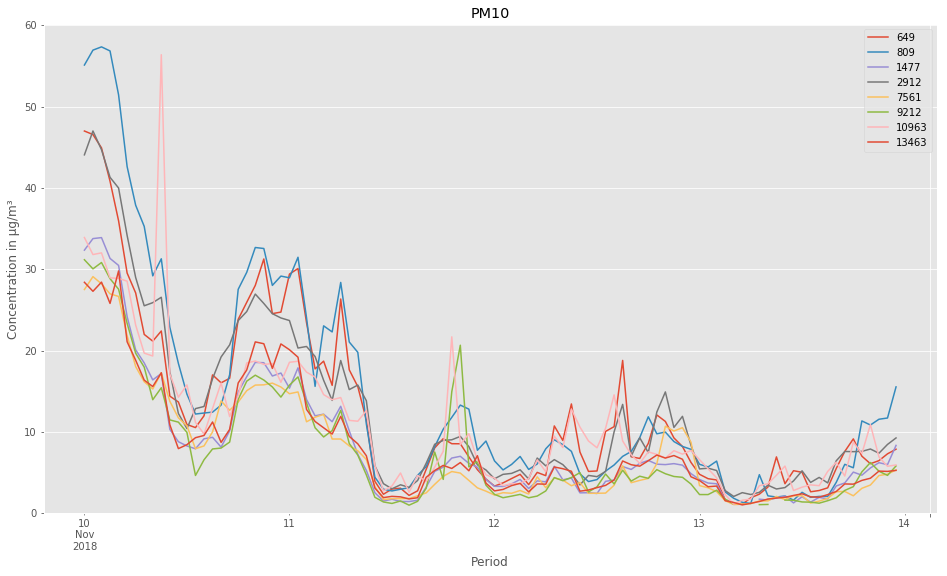

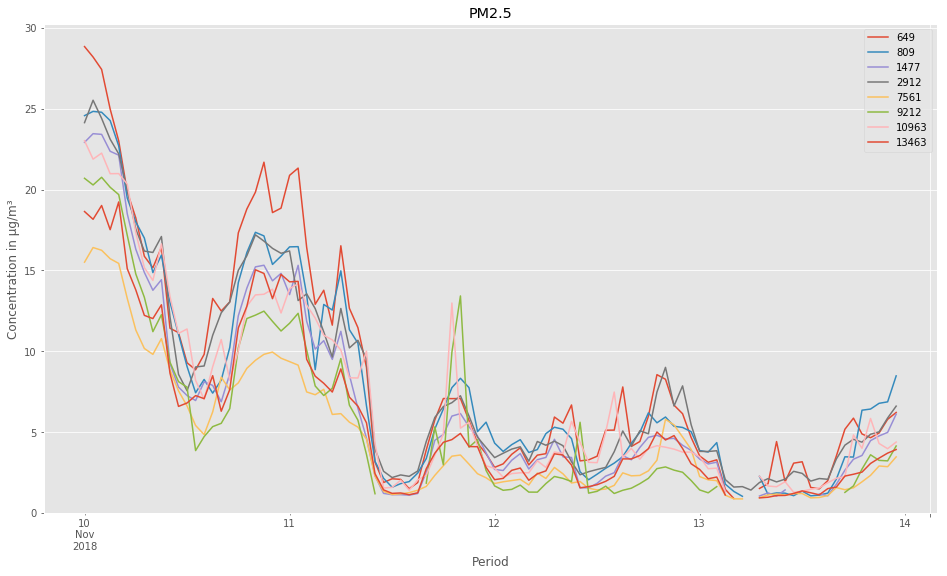

In [15]:
(near_sensors,hourly_means) = aq.luftdaten.evaluate_near_sensors(start_date="2018-11-10",
                                                 end_date="2018-11-13",
                                                 radius=1,
                                                 quiet=True)

In [16]:
hourly_means

PM10                                                   \
                  649    809    1477   2912   7561   9212   10963  13463   
Period                                                                     
2018-11-10 00:00  46.99  55.11  32.35  44.06  27.50  31.17  33.90  28.39   
2018-11-10 01:00  46.56  56.94  33.77  47.00  29.09  30.04  31.80  27.29   
2018-11-10 02:00  44.92  57.34  33.89  44.70  28.20  30.82  32.01  28.41   
2018-11-10 03:00  40.82  56.84  31.33  41.30  26.97  28.84  28.94  25.80   
2018-11-10 04:00  35.95  51.44  30.47  39.99  26.66  27.54  28.87  29.79   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
2018-11-13 19:00   7.01  11.35   4.67   7.60   3.06   5.08   7.33   4.03   
2018-11-13 20:00   6.08  10.84   5.57   7.89   3.47   6.23  10.89   4.30   
2018-11-13 21:00   6.46  11.55   6.21   7.38   4.63   5.16   6.92   5.18   
2018-11-13 22:00   7.30  11.70   5.97   8.46   4.80   4.65   5.77   5.14   
2018-11-13 23:00   7.87  15.53   8.34   9.25   5.32   5.81   5.93   5.26   

                  PM2.5                                                   
                  649    809    1477   2912   7561   9212   10963  13463  
Period                                                                    
2018-11-10 00:00  28.83  24.57  22.92  24.13  15.51  20.69  23.02  18.64  
2018-11-10 01:00  28.19  24.83  23.45  25.52  16.42  20.28  21.88  18.16  
2018-11-10 02:00  27.42  24.78  23.41  24.40  16.25  20.76  22.25  19.01  
2018-11-10 03:00  24.97  24.26  22.36  23.11  15.73  20.14  20.98  17.52  
2018-11-10 04:00  23.01  22.70  22.12  22.20  15.44  19.69  20.99  19.23  
...                 ...    ...    ...    ...    ...    ...    ...    ...  
2018-11-13 19:00   4.90   6.36   3.57   4.39   1.94   2.73   4.01   2.54  
2018-11-13 20:00   4.66   6.44   4.48   4.88   2.34   3.61   5.85   3.07  
2018-11-13 21:00   4.96   6.79   4.77   5.03   2.92   3.26   4.31   3.40  
2018-11-13 22:00   5.80   6.88   4.99   5.88   2.87   3.23   3.99   3.71  
2018-11-13 23:00   6.22   8.48   6.12   6.62   3.48   4.15   4.40   3.93  

[96 rows x 16 columns]

### Compare data from any sensors

In [23]:
sensor_info2 = aq.luftdaten.Sensor("108")  # Temperature and humidity sensor

In [24]:
sensor_info2.current_measurements

{'humidity': 1.0, 'temperature': 6.9}

In [25]:
sensor_info2.metadata

id                                 2696516092
location.altitude                       373.1
location.country                           DE
location.id                                49
location.latitude                     48.5300
                                      ...    
sensor.id                                 108
sensor.pin                                  7
sensor.sensor_type.id                       9
sensor.sensor_type.manufacturer       various
sensor.sensor_type.name                 DHT22
Name: metadata, Length: 11, dtype: object

In [26]:
sensor_info2.get_measurements(start_date="2018-11-05", end_date="2018-11-10")

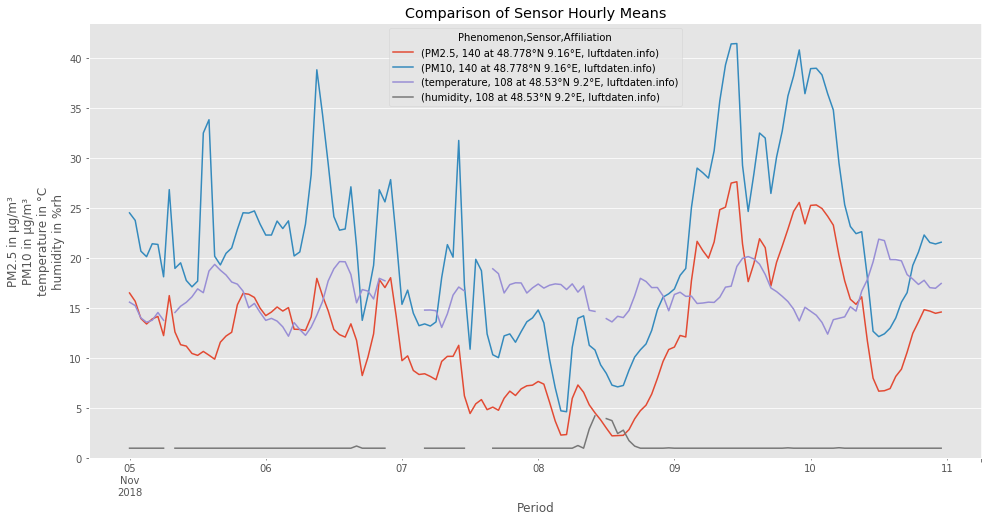

In [27]:
combined_data, plot = aq.compare_sensor_data(sensors=[sensor_info, sensor_info, sensor_info2, sensor_info2],
                                          columns=["PM2.5", "PM10", "temperature", "humidity"],
                                          start_date="2018-11-05",
                                          end_date="2018-11-10",
                                          hourly_means=True,
                                          quiet=True)

In [28]:
combined_data.head(10)

Phenomenon,PM2.5,PM10,temperature,humidity
Sensor,140 at 48.778°N 9.16°E,140 at 48.778°N 9.16°E,108 at 48.53°N 9.2°E,108 at 48.53°N 9.2°E
Affiliation,luftdaten.info,luftdaten.info,luftdaten.info,luftdaten.info
Period,,,,
2018-11-05 00:00,16.51,24.52,15.60,1.0
2018-11-05 01:00,15.68,23.77,15.25,1.0
2018-11-05 02:00,13.96,20.69,14.02,1.0
2018-11-05 03:00,13.41,20.14,13.59,1.0
2018-11-05 04:00,13.92,21.43,13.79,1.0
2018-11-05 05:00,14.17,21.36,14.56,1.0
2018-11-05 06:00,12.25,18.13,13.78,1.0


In [29]:
combined_data.corr()

,,Phenomenon,PM2.5,PM10,temperature,humidity
,,Sensor,140 at 48.778°N 9.16°E,140 at 48.778°N 9.16°E,108 at 48.53°N 9.2°E,108 at 48.53°N 9.2°E
,,Affiliation,luftdaten.info,luftdaten.info,luftdaten.info,luftdaten.info
Phenomenon,Sensor,Affiliation,,,,
PM2.5,140 at 48.778°N 9.16°E,luftdaten.info,1.00,0.94,-0.17,-0.35
PM10,140 at 48.778°N 9.16°E,luftdaten.info,0.94,1.00,-0.15,-0.32
temperature,108 at 48.53°N 9.2°E,luftdaten.info,-0.17,-0.15,1.00,-0.23
humidity,108 at 48.53°N 9.2°E,luftdaten.info,-0.35,-0.32,-0.23,1.00


## More advanced analysis
We can analyze the measurement data using Pandas' extensive capabilities.

### Get More Data

In [19]:
sensor_info.get_measurements(start_date="2018-05-24",
                             end_date="2018-06-01",
                             quiet=True)
data = sensor_info.measurements["PM2.5"]

# Convert index to local time
data.index = data.index.tz_convert("Europe/Berlin")

describe(data)

count    5261.00
mean       10.79
std         3.07
min         4.50
1%          5.52
50%        10.38
99%        19.85
max        24.80
Name: PM2.5, dtype: float64

### Summarize measurements by day of the week

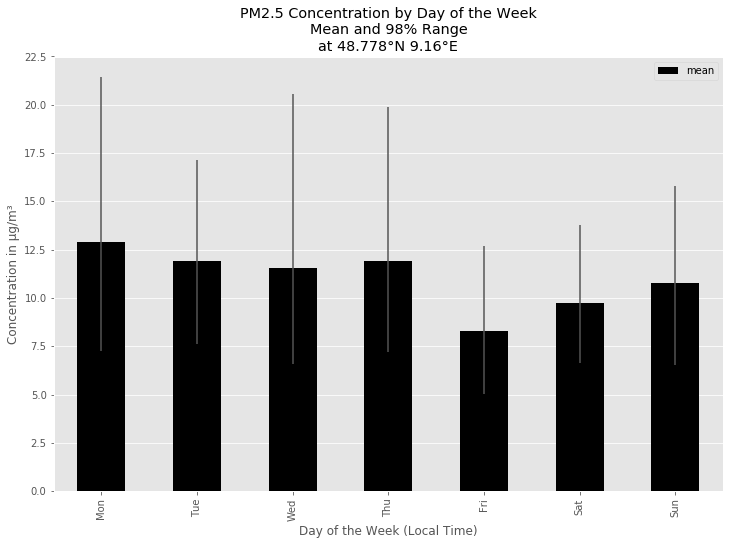

In [20]:
# Produce a statistical summary of the data grouped by day of the week
grouping_variable = data.index.dayofweek
weekday_summary = data.groupby(grouping_variable).describe(percentiles=[0.01, 0.99])

# Show day names instead of integers
import calendar

calendar.setfirstweekday(1)  # Start week on Monday
weekday_summary.index = [calendar.day_abbr[i] for i in weekday_summary.index]
weekday_summary.index.name = "Day of the Week (Local Time)"

# Get spread values
yspread = [[(weekday_summary["mean"] - weekday_summary["1%"]),
            (weekday_summary["99%"] - weekday_summary["mean"])]]

# Plot
title = ("PM2.5 Concentration by Day of the Week\n"
         "Mean and 98% Range\n" + sensor_info.label)

ax = (weekday_summary["mean"]
      .plot(kind="bar", ylim=(0, None), color="black", title=title,
            yerr=yspread, legend=True, figsize=(12, 8)))
ax.set(ylabel="Concentration in µg/m³")
ax.xaxis.grid(False);

In [21]:
weekday_summary

,count,mean,std,min,1%,50%,99%,max
Day of the Week (Local Time),,,,,,,,
Mon,581.0,12.88,3.39,6.97,7.25,12.52,21.42,24.80
Tue,580.0,11.94,2.17,6.77,7.63,12.03,17.16,19.23
Wed,590.0,11.56,3.66,5.95,6.59,10.93,20.56,23.20
Thu,1116.0,11.90,3.12,6.30,7.21,11.10,19.88,21.57
Fri,1176.0,8.31,1.84,4.50,5.03,8.20,12.68,15.77
Sat,631.0,9.73,1.70,6.15,6.63,9.50,13.80,16.30
Sun,587.0,10.79,2.10,6.12,6.56,10.77,15.77,17.63


### Summarize measurements by hour of the day

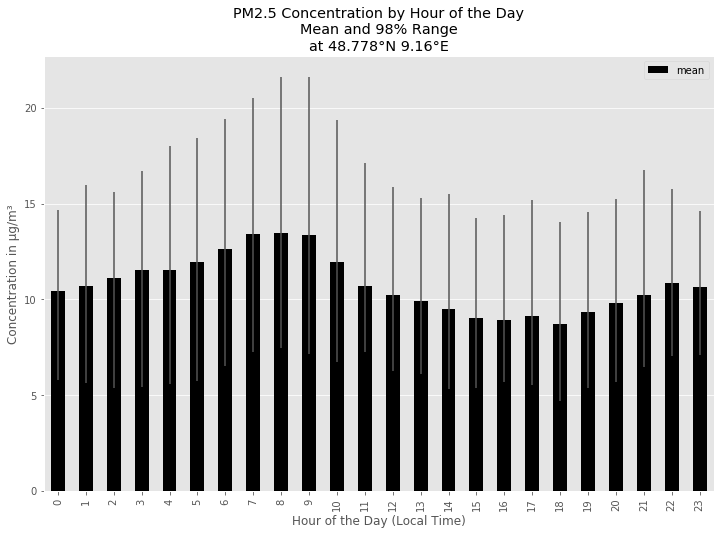

In [22]:
# Analyze data
grouping_variable = data.index.hour
hour_summary = data.groupby(grouping_variable).describe(percentiles=[0.01, 0.99])
hour_summary.index.name = "Hour of the Day (Local Time)"

# Get spread values
yspread = [[(hour_summary["mean"] - hour_summary["1%"]),
            (hour_summary["99%"] - hour_summary["mean"])]]

# Plot
title = ("PM2.5 Concentration by Hour of the Day\n"
         "Mean and 98% Range\n" + sensor_info.label)
ax = (hour_summary["mean"]
      .plot(kind="bar", ylim=(0, None), color="black", title=title,
            yerr=yspread, legend=True, figsize=(12, 8)))
ax.set(ylabel="Concentration in µg/m³")
ax.xaxis.grid(False);

In [23]:
hour_summary

,count,mean,std,min,1%,50%,99%,max
Hour of the Day (Local Time),,,,,,,,
0,212.0,10.44,2.37,5.63,5.78,10.50,14.68,16.13
1,219.0,10.71,2.76,5.27,5.61,10.67,15.97,17.63
2,220.0,11.11,2.66,5.03,5.39,11.59,15.62,16.57
3,216.0,11.54,2.74,4.73,5.41,12.25,16.73,18.10
4,223.0,11.52,2.96,5.30,5.58,11.13,18.03,18.27
...,...,...,...,...,...,...,...,...
19,220.0,9.32,2.12,5.28,5.40,9.13,14.58,19.17
20,220.0,9.80,2.12,5.30,5.69,9.80,15.25,17.90
21,222.0,10.22,2.29,6.20,6.49,10.06,16.74,17.75
